# Time series analysis and visualisation

Water resource infrastructure (and drainage infrastructure) deals with water inflows and uses that vary over time. To design infrastructure and / or adaptation measures, a first step is to use time series to assess the variations of key water variables over time: this is necessary to assess their performance.

In this tutorial we have a first look at the data from the Conowingo case-study:

**Part 1:** We unpack the monthly demand data and use that as an introduction to the Pandas library. This is Excel in Python!

**Part 2:** We visualise the variable inflows to the Conowingo reservoir and contrast this with demand.

**Part 3:** An exercise to reproduce some of the results from Part 2 using Gemini.

# Part 1: Data Analysis using Pandas

In this part we will look at the demand data from Conowingo. These demands are also listed on the reservoir's schematic.

First, we need to import any library we want to use!

In [1]:
import pandas as pd

### What is Pandas?
>* Pandas is an **extremely popular library** for data analysis. You can generally think of it as an **Excel replacement**.
>* Like Excel, it reads tabular data and provides a **full toolbox** to manipulate and analyse it.
>* It is able to **read data from most common file types**: Excel, CXV, Text, etc.
>* Even better, **it can write tables back into these formats**.
>* It is practical for **time series analysis**, as it provides hands-on tools for dealing with dates/time and missing data

### Why use Pandas?
>* As **datasets are becoming bigger and more complex**, tools such as pandas are becoming increasingly essential.
>* Anlysis using Python and Pandas is generally **more transparent and easier to follow** than that done in speadsheets.
>* Contrary to Excel, it makes it easy to **separate input data and analysis results** into separate spreadsheets. This way the original data is kept.
>* When working with multiple datasets, pandas **code can be reapplied easily**.

### Do I need to be a Python wizard?
>* No! In general **AI tools (Gemini, ChatGPT, etc.) can help you**. They are pretty good with queries such as "I want to do this and that with pandas in Python" (or any other library).
>* You do **need to double-check** that the AI tool is doing what you want though!
>* If the AI tool gives you an imcomplete and / or difficult to use answer: (i) **use AI prompts to refine the answer**, and (ii) **use the documentation**, in general extensive and easy-to-search for popular Python libraries (e.g., for Pandas: https://pandas.pydata.org/docs/)

## 1.1 Creating a DataFrame from spreadsheet data
>* Pandas allows reading importing data from an Excel/csv file into a pandas DataFrame.
>* We can read a CSV file with pandas by using `pd.read_csv`. Excel files can be read using `pd.read_excel`.

In [2]:
filepath = r"data\Conowingo_data.xlsx" # r is to treat all characters between the quotes as a raw string.
                                  # Otherwise, special couples, such as "\n", may be treated as a new line

# Read specific extent (columns and rows) from a specific worksheet
demand_df = pd.read_excel(filepath, 
                          sheet_name='Demands', # Specify the worksheet
                          usecols="A:E",        # Specify columns (e.g., columns A to E)
                          skiprows=0,           # (Optional) Skip the first n row if necessary (skiprows=0 does not skip a row)
                          nrows=12,             # (Optional) Read the first 12 rows after the first row (first row will be column titles)
                          index_col=0)          # Dataframe index column (0 indicates the first column)
demand_df

,Baltimore city (cfs),Chester city (cfs),Peach Bottom Nuclear Power Plant (cfs),Minimum environmental flows (cfs)
Month,,,,
January,464,52,22,3500
February,464,55,20,3500
March,464,50,24,3500
April,464,47,29,10000
May,464,52,35,7500
June,464,54,41,5000
July,464,53,42,5000
August,464,54,40,5000
September,464,53,32,4200


## 1.2 Selecting and displaying parts of a DataFrame

Here we are going to look at:
>* Displaying the index of the DataFrame, i.e. the row labels.
>* Displaying the columns of the DataFrame, i.e., the... column labels.
>* Displaying the first / last n rows of a DataFrame: the `head` and `tail` methods.
>* Selecting slices of the DataFrame: a column, a row, one value, a range of values. Pay close attention to methods `loc` and `iloc`.

### Querying the index of a DataFramme
>* `DataFrame.index` will return information about the row names. In timeseries the index is generally a list of temporal markers. Here, months.

In [3]:
print(demand_df.index)

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='Month')


### Querying the columns of a DataFramme
>* `DataFrame.columns` will return information about the columns names.

In [4]:
print(demand_df.columns)

Index(['Baltimore city (cfs)', 'Chester city (cfs)',
       'Peach Bottom Nuclear Power Plant (cfs)',
       'Minimum environmental flows (cfs)'],
      dtype='object')


### Displaying the first / last few rows of a DataFrame
>* `DataFrame.head(n)` will return the first n rows of the DataFrame.
>* `DataFrame.tail(n)` will return the last n rows of the DataFrame.

In [5]:
# Display only the first 3 rows of the DataFrame
demand_df.head(3)

,Baltimore city (cfs),Chester city (cfs),Peach Bottom Nuclear Power Plant (cfs),Minimum environmental flows (cfs)
Month,,,,
January,464,52,22,3500
February,464,55,20,3500
March,464,50,24,3500


In [6]:
# Display only the last 2 rows of the dataframe
demand_df.tail(2)

,Baltimore city (cfs),Chester city (cfs),Peach Bottom Nuclear Power Plant (cfs),Minimum environmental flows (cfs)
Month,,,,
November,464,52,30,3500
December,464,51,23,3500


### Selecting values: slicing a DataFrame

>* Referencing one column by using `DataFrame[name_of_column]`

In [7]:
demand_df["Minimum environmental flows (cfs)"]

Month
January       3500
February      3500
March         3500
April        10000
May           7500
June          5000
July          5000
August        5000
September     4200
October       3500
November      3500
December      3500
Name: Minimum environmental flows (cfs), dtype: int64

>* Subsetting a DataFrame by using `DataFrame.loc`. This selection finds a value within the DataFrame below `df.loc[index, column]` where index and column are their **labels**.

In [8]:
demand_df.loc["June", "Minimum environmental flows (cfs)"]

5000

>* Use the notation `:` when you want to select all the values for either rows or columns

We get the same result as with calling a column above, but we can also use this to display a row.

In [9]:
demand_df.loc[:, "Minimum environmental flows (cfs)"]

Month
January       3500
February      3500
March         3500
April        10000
May           7500
June          5000
July          5000
August        5000
September     4200
October       3500
November      3500
December      3500
Name: Minimum environmental flows (cfs), dtype: int64

In [10]:
demand_df.loc["June", :]

Baltimore city (cfs)                       464
Chester city (cfs)                          54
Peach Bottom Nuclear Power Plant (cfs)      41
Minimum environmental flows (cfs)         5000
Name: June, dtype: int64

>* Subsetting a DataFrame by using `DataFrame.iloc`. This selection finds a values as above but now index and column are instead their **positions**. Please note: In python, position indexing starts from 0.

In [11]:
demand_df.iloc[6, 2]

42

>* Subsetting a DataFrame with a range of criteria. Can be done both with `df.loc` and `df.iloc`.

In [12]:
demand_df.loc[["November", "March", "August", "May"], ["Peach Bottom Nuclear Power Plant (cfs)","Chester city (cfs)"]]

,Peach Bottom Nuclear Power Plant (cfs),Chester city (cfs)
Month,,
November,30,52
March,24,50
August,40,54
May,35,52


In [13]:
demand_df.iloc[2:5, 1:3] # Display the slice of the dataframe from 3rd to 5th row and 2nd to 3rd column

,Chester city (cfs),Peach Bottom Nuclear Power Plant (cfs)
Month,,
March,50,24
April,47,29
May,52,35


## 1.3 Manipulating a DataFrame

This presentes some useful operations:
>* Conversion from one set of units to another. **Unit conversion is very important for calculations**, as data sources using different units need to be put together in a single coherent system.
>* Adding columns.
>* Summing up data with `df.sum()`.
>* Averaging data with `df.mean()`.
>* Removing columns.

### Unit conversion

Our data has an annoying format: cubic feet per second. Let's convert to metric.

In [14]:
# Convert all values in the dataframe to metric system units: conversion from cfs to m3/s
demand_df = demand_df * 0.3048**3

# We need to also change "cfs" with "m3/s" in column headers
demand_df.columns = pd.Series(demand_df.columns).replace('cfs', 'm3/s', regex=True)

# What does that look like, rounded to the first decimal place?
demand_df.round(1)

,Baltimore city (m3/s),Chester city (m3/s),Peach Bottom Nuclear Power Plant (m3/s),Minimum environmental flows (m3/s)
Month,,,,
January,13.1,1.5,0.6,99.1
February,13.1,1.6,0.6,99.1
March,13.1,1.4,0.7,99.1
April,13.1,1.3,0.8,283.2
May,13.1,1.5,1.0,212.4
June,13.1,1.5,1.2,141.6
July,13.1,1.5,1.2,141.6
August,13.1,1.5,1.1,141.6
September,13.1,1.5,0.9,118.9


## Getting totals

>* Example uses of `df_sum`, note the axis.

Here we calculate the total of demands, and add it as a new column to our data frame. Then we do the same for potable demand only (Chester & Baltimore).

In [15]:
# Calculate the sum of values across each row in the dataframe (for total monthly demand)
# Calculated sum will be added as a new column to the copied dataframe
demand_df["Total Demand (m3/s)"]  = demand_df.sum(axis=1)
demand_df.round(1).head()

,Baltimore city (m3/s),Chester city (m3/s),Peach Bottom Nuclear Power Plant (m3/s),Minimum environmental flows (m3/s),Total Demand (m3/s)
Month,,,,,
January,13.1,1.5,0.6,99.1,114.3
February,13.1,1.6,0.6,99.1,114.4
March,13.1,1.4,0.7,99.1,114.3
April,13.1,1.3,0.8,283.2,298.5
May,13.1,1.5,1.0,212.4,228.0


In [16]:
# Same for potable demand
demand_df["Total Potable Water Demand (m3/s)"]  = demand_df["Chester city (m3/s)"] + demand_df["Baltimore city (m3/s)"]
demand_df.round(1).head()

,Baltimore city (m3/s),Chester city (m3/s),Peach Bottom Nuclear Power Plant (m3/s),Minimum environmental flows (m3/s),Total Demand (m3/s),Total Potable Water Demand (m3/s)
Month,,,,,,
January,13.1,1.5,0.6,99.1,114.3,14.6
February,13.1,1.6,0.6,99.1,114.4,14.7
March,13.1,1.4,0.7,99.1,114.3,14.6
April,13.1,1.3,0.8,283.2,298.5,14.5
May,13.1,1.5,1.0,212.4,228.0,14.6


## Getting averages

>* Example uses of `df_mean`, note the axis.

In [17]:
# Calculate the average volumetric demand across each column, throughout the year
annual_means = demand_df.mean(axis=0)

# Print the result
print(annual_means.round(1))

Baltimore city (m3/s)                       13.1
Chester city (m3/s)                          1.5
Peach Bottom Nuclear Power Plant (m3/s)      0.9
Minimum environmental flows (m3/s)         136.2
Total Demand (m3/s)                        151.6
Total Potable Water Demand (m3/s)           14.6
dtype: float64


In [18]:
annual_means["Total Demand (m3/s)"].round(1)

151.6

In [19]:
# Calculate the percent contribution for each demand to the annual total demand
percent_contribution = (annual_means.iloc[:4] / annual_means["Total Demand (m3/s)"]) * 100

# Print the result
print(percent_contribution)

Baltimore city (m3/s)                       8.665608
Chester city (m3/s)                         0.971146
Peach Bottom Nuclear Power Plant (m3/s)     0.563389
Minimum environmental flows (m3/s)         89.799857
dtype: float64


## Remove a column

In [20]:
# Need to set axis=1 overwise drop will try to remove a row as the default is axis=0
demand_df = demand_df.drop("Total Potable Water Demand (m3/s)", axis=1)
demand_df.round(1).head()

,Baltimore city (m3/s),Chester city (m3/s),Peach Bottom Nuclear Power Plant (m3/s),Minimum environmental flows (m3/s),Total Demand (m3/s)
Month,,,,,
January,13.1,1.5,0.6,99.1,114.3
February,13.1,1.6,0.6,99.1,114.4
March,13.1,1.4,0.7,99.1,114.3
April,13.1,1.3,0.8,283.2,298.5
May,13.1,1.5,1.0,212.4,228.0


In [21]:
# Remove another column
demand_df = demand_df.drop("Total Demand (m3/s)", axis=1)
demand_df.head()

,Baltimore city (m3/s),Chester city (m3/s),Peach Bottom Nuclear Power Plant (m3/s),Minimum environmental flows (m3/s)
Month,,,,
January,13.139017,1.472476,0.622971,99.108963
February,13.139017,1.557427,0.566337,99.108963
March,13.139017,1.415842,0.679604,99.108963
April,13.139017,1.330892,0.821189,283.168466
May,13.139017,1.472476,0.991090,212.376349


# Part 2: Visualising time series data

### Working with timeseries data
>* We often work with data with a temporal axis, pandas makes it easy to deal with this.
>* We normally set the time-axis as the index.
>* Control for reading in datasets, skip rows and columns.

### We can set date to be the index column and recognise this as a DateTimeIndex
>* Use `index_col` to set the column you want.
>* Use `parse_date` so dates are automatically read in the right format.

In [22]:
# Read specific extent (columns and rows) from a specific worksheet
flow_df = pd.read_excel(filepath, 
                        sheet_name='Flow data', # Specify the worksheet
                        index_col=0,  # Dataframe index column (0 indicates the 1st column)
                        parse_dates=True)            



flow_df.head()

,Susquehanna River Inflow (cfs),Lateral Inflow (cfs)
Date,,
1932-01-01,19500,172
1932-01-02,21400,1148
1932-01-03,25900,897
1932-01-04,28600,501
1932-01-05,27200,359


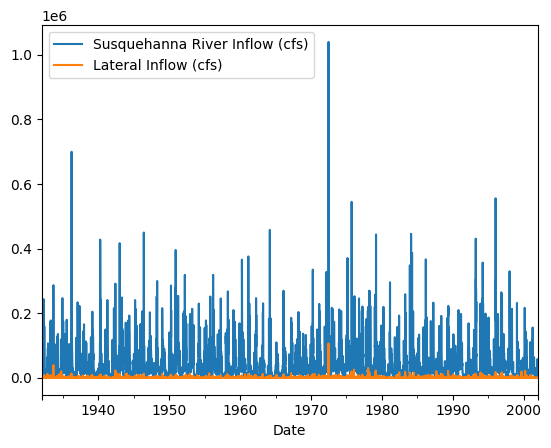

In [23]:
import matplotlib.pyplot as plt
flow_df.loc[:,["Susquehanna River Inflow (cfs)","Lateral Inflow (cfs)"]].plot()
plt.show()

Clearly river inflows to the reservoirs are the bulk of the total inflows. Let's have a new, total inflow column using SI units.

<Axes: xlabel='Date'>

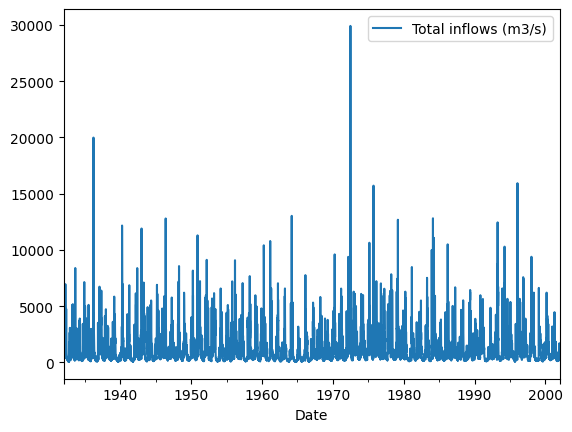

In [24]:
flow_df['Total inflows (m3/s)'] = flow_df.sum(axis=1) * 0.3048**3

flow_df.loc[:, ['Total inflows (m3/s)']].plot()

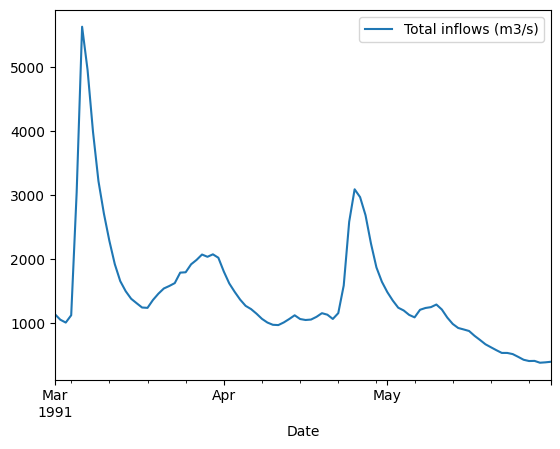

In [25]:
# Plot only a subset in the dataframe
flow_df.loc["1991-3-1":"1991-5-31",['Total inflows (m3/s)']].plot()
plt.show()

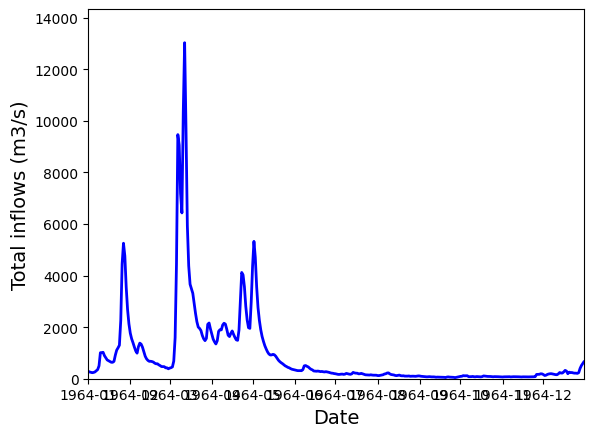

In [26]:
# You can also customise the visuals if you want!
import datetime

def plot_flux(balance, flux_name, **kwargs):
    """
    Plots daily timeseries of a water balance flow component over time. Arguments:
        balance: a Pandas DataFrame containing the time series of the water flux to plot
        flux_name: a string with the name of the flow component to plot
        optional argument `first_date`: a datetime date to specify when to start plotting
        optional argument `last_date`: a datetime date to specify when to stop plotting
    Returns the matplotlib figure created, for plotting / saving, etc.
    """

    # Optional arguments
    first_date = kwargs.pop("first_date", balance.index[0])
    last_date = kwargs.pop('last_date', balance.index[-1])

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(balance.index, balance[flux_name + ' (m3/s)'], c='b', linewidth=2)
    ax.set_xlabel('Date', size=14)
    ax.set_ylabel(flux_name + ' (m3/s)', size=14)
    ax.set_xlim(first_date, last_date)
    ax.set_ylim(0, balance.loc[first_date : last_date, flux_name + ' (m3/s)'].max() * 1.1)

    return fig

fig = plot_flux(flow_df, 'Total inflows', first_date=datetime.date(1964, 1, 1), last_date=datetime.date(1964,12,31))

### Filter for values above a threshold

In [27]:
mask = flow_df['Total inflows (m3/s)'] > 500
mask

Date
1932-01-01     True
1932-01-02     True
1932-01-03     True
1932-01-04     True
1932-01-05     True
              ...  
2001-12-27     True
2001-12-28     True
2001-12-29     True
2001-12-30     True
2001-12-31    False
Name: Total inflows (m3/s), Length: 25568, dtype: bool

In [28]:
flow_df[mask]

,Susquehanna River Inflow (cfs),Lateral Inflow (cfs),Total inflows (m3/s)
Date,,,
1932-01-01,19500,172,557.049006
1932-01-02,21400,1148,638.488257
1932-01-03,25900,897,758.806538
1932-01-04,28600,501,824.048553
1932-01-05,27200,359,780.383975
...,...,...,...
2001-12-26,28100,1588,840.670542
2001-12-27,25800,1603,775.966547
2001-12-28,23700,1604,716.529486


# Resample a DataFrame using the datetime index

<Axes: xlabel='Date'>

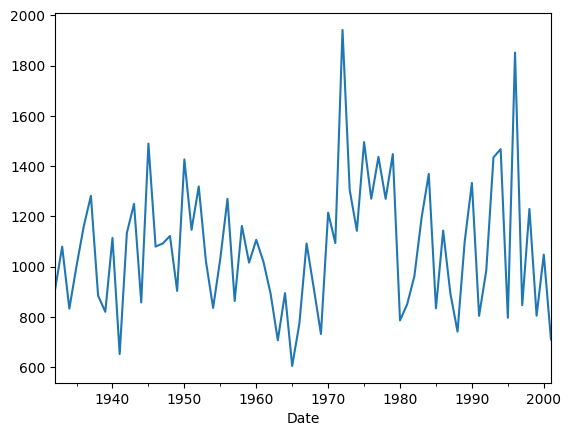

In [29]:
# Resample the dataframe into annual average flows
flow_df['Total inflows (m3/s)'].resample("YE").mean().plot()

<Axes: xlabel='Date'>

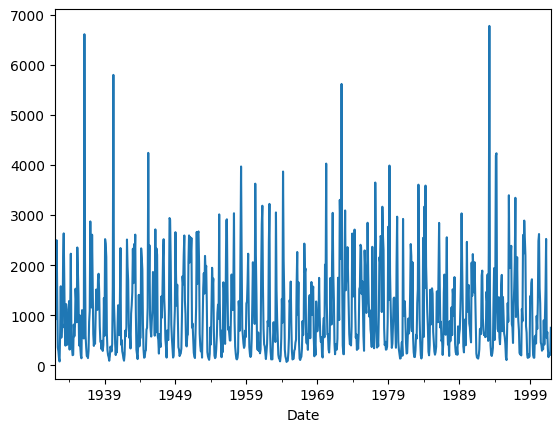

In [30]:
# Resample the dataframe into monthly mean flow
flow_df['Total inflows (m3/s)'].resample("1ME").mean().plot()

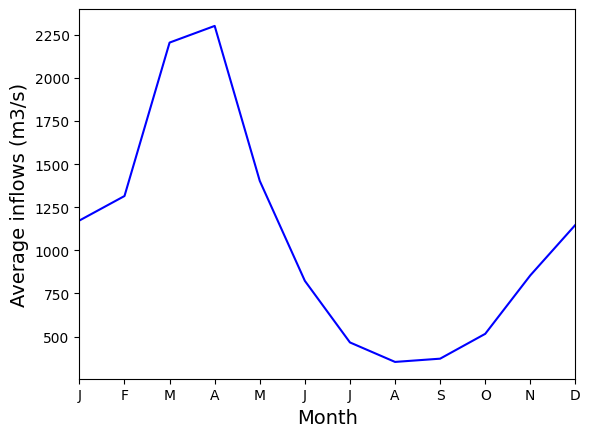

In [31]:
import numpy as np

# But what does that look like on average
def compute_monthly_average(flows, variable_name):
    """
    Computes monthly average inflows from a `flows` pandas DataFrame containing a 'Total inflows (m3/s)' column.
    Output:
    averages: a Numpy vector of size 12 for the 12 average monthly values
    """

    # Initialise output
    averages = np.zeros(12)

    # Main loop to compute all 12 monthly averages
    for month in np.arange(1, 13, 1):
        monthly_mask = flows.index.month == month  # Select only values for the right month
        averages[month - 1] = flows.loc[monthly_mask, variable_name].mean()  # Apply average operator

    return averages


# Plotting the figure
def monthly_averages(flows, variable_name):
    """
    Plot monthly average inflows from `flows` pandas DataFrame.
    """

    # Get monthly average inflows
    monthly_average = compute_monthly_average(flows, variable_name)

    # Plot figure
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(np.arange(1, 13, 1), monthly_average, c='b')
    plt.xticks(ticks=np.arange(1, 13, 1), labels=['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
    ax.set_xlabel('Month', size=14)
    ax.set_ylabel('Average inflows (m3/s)', size=14)
    ax.set_xlim(1, 12)

    return fig

fig = monthly_averages(flow_df, 'Total inflows (m3/s)')

Did you notice we just introduced the numpy library?